Project done by -
1. Aditya Patil 
2. Aryamaan Jena 
3. Dhruvi Shah

In [1]:
# import libraries

import tensorflow as tf
import numpy as np
import pandas as pd
import os

# DATA IMPORT

In [2]:
ls # check the directory for required files

 Volume in drive C has no label.
 Volume Serial Number is 1672-AE4E

 Directory of C:\Users\Dhruvi\Desktop\Sem5\Data mining


 Directory of C:\Users\Dhruvi\Desktop\Sem5\Data mining


 Directory of C:\Users\Dhruvi\Desktop\Sem5\Data mining


 Directory of C:\Users\Dhruvi\Desktop\Sem5\Data mining


 Directory of C:\Users\Dhruvi\Desktop\Sem5\Data mining


 Directory of C:\Users\Dhruvi\Desktop\Sem5\Data mining


 Directory of C:\Users\Dhruvi\Desktop\Sem5\Data mining



File Not Found


In [14]:
# unzip train, validation and test sets

import zipfile

zip_file  = zipfile.ZipFile('./Train_Set.zip')
zip_file.extractall()
zip_file.close()

zip_file  = zipfile.ZipFile('./Validation_Set.zip')
zip_file.extractall()
zip_file.close()

zip_file  = zipfile.ZipFile('./Test_Set.zip')
zip_file.extractall()
zip_file.close()

In [15]:
ls # check for unzipped directories

 Volume in drive C has no label.
 Volume Serial Number is 1672-AE4E

 Directory of C:\Users\Dhruvi\Desktop\Sem5\Data mining




File Not Found


 Directory of C:\Users\Dhruvi\Desktop\Sem5\Data mining


 Directory of C:\Users\Dhruvi\Desktop\Sem5\Data mining


 Directory of C:\Users\Dhruvi\Desktop\Sem5\Data mining


 Directory of C:\Users\Dhruvi\Desktop\Sem5\Data mining



In [24]:
# Check for hidden files / folders which must be deleted if they exist

os.listdir('Test_Set/Test_set')

['Paper_144.jpg',
 'Paper_145.jpg',
 'Paper_146.jpg',
 'Paper_147.jpg',
 'Paper_148.jpg',
 'Paper_149.jpg',
 'Paper_150.jpg',
 'Paper_77.jpg',
 'Paper_78.jpg',
 'Paper_79.jpg',
 'Paper_80.jpg',
 'Rock_144.jpg',
 'Rock_145.jpg',
 'Rock_146.jpg',
 'Rock_147.jpg',
 'Rock_148.jpg',
 'Rock_149.jpg',
 'Rock_150.jpg',
 'Rock_77.jpg',
 'Rock_78.jpg',
 'Rock_79.jpg',
 'Rock_80.jpg',
 'Scissors_144.jpg',
 'Scissors_145.jpg',
 'Scissors_146.jpg',
 'Scissors_147.jpg',
 'Scissors_148.jpg',
 'Scissors_149.jpg',
 'Scissors_150.jpg',
 'Scissors_77.jpg',
 'Scissors_78.jpg',
 'Scissors_79.jpg',
 'Scissors_80.jpg']

In [25]:
# Check the number of images for rock, paper and scissors

print ('Number of rock images: ', len(os.listdir('Train_Set/Rock')))
print ('Number of paper images: ', len(os.listdir('Train_Set/Paper')))
print ('Number of scissors images: ', len(os.listdir('Train_Set/Scissors')))

print("##########################")

print ('Number of rock images: ', len(os.listdir('Validation_Set/Rock')))
print ('Number of paper images: ', len(os.listdir('Validation_Set/Paper')))
print ('Number of scissors images: ', len(os.listdir('Validation_Set/Scissors')))

print("##########################")

print ('Number of test images: ', len(os.listdir('Test_Set/Test_set')))

Number of rock images:  104
Number of paper images:  104
Number of scissors images:  104
##########################
Number of rock images:  35
Number of paper images:  35
Number of scissors images:  35
##########################
Number of test images:  33


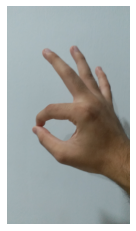

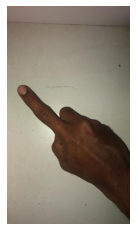

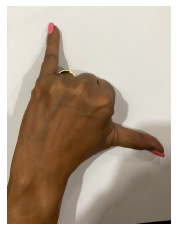

In [26]:
# Validating if the data is imported correctly

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Creating list of file names of the 3 different classes
rock_images = os.listdir('Train_Set/Rock')
paper_images = os.listdir('Train_Set/Paper')
scissors_images = os.listdir('Train_Set/Scissors')

# Adding path name to the file names
rock_images  = ['Train_Set/Rock/' + rock_image for rock_image in rock_images]
paper_images  = ['Train_Set/Paper/' + paper_image for paper_image in paper_images]
scissors_images  = ['Train_Set/Scissors/' + scissors_image for scissors_image in scissors_images]

# Checking path names for one example from each class
for img_path in [rock_images[0],paper_images[0],scissors_images[0]]:
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

Variability in the data is brought about by:
1. Flipping of the dorection the palm faces
2. Objects like rings, bands, nail paint etc.
3. Using both right and left hands at various angles and tilts

White backgrounds were used for images as due to the dataset being very small, excessive variation in the background causes models to generalize well only after a large number of epochs. Moreover, through data augmentation, more variability is introduced into the training data.

# DATA PREPROCESSING

In [27]:
# Building Training, Validation and Test Data Generators

from keras.preprocessing.image import ImageDataGenerator

# Generate training tensor data with real time augmentation
training_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                      featurewise_center = True, # sets input mean to 0
                                      featurewise_std_normalization = True, # divide inputs by std of the dataset, 
                                      # feature-wise
                                      rotation_range = 20, # degree range for random rotations
                                      width_shift_range = 0.2, # % for random horizontal shift
                                      height_shift_range = 0.2, # % for random vertical shift
                                      shear_range = 0.2, # % for random horizontal shift
                                      zoom_range = 0.2, # % for random zoom in or out
                                      horizontal_flip = True, # flip along horizontal axis
                                      vertical_flip = True, # flip along vertical axis
                                      fill_mode = 'nearest') # replaces empty pixels with nearest values

# Generate Training Images
training_generator = training_datagen.flow_from_directory(directory = r"./Train_Set/", # path
                                                          batch_size = 64, # no. of images yielded per batch
                                                          target_size = (224,224), # images resized
                                                          color_mode = "rgb", # colour images input
                                                          shuffle = True, # shuffle the input randomly
                                                          class_mode = 'categorical', # classes to predict
                                                          subset = 'training', 
                                                          seed = 42) # to reproduce results 

# Generate validation tensor data with real time augmentation
validation_datagen = ImageDataGenerator(rescale = 1.0/255.0)

# Generate validation images 
valid_generator = validation_datagen.flow_from_directory(
    directory = r"./Validation_Set/",
    target_size = (224, 224),
    color_mode = "rgb",
    batch_size = 12,
    class_mode = "categorical",
    shuffle = True,
    seed = 42)

# Generate test tensor data with real time augmentation
test_datagen = ImageDataGenerator(rescale = 1.0/255.0)

# Generate test images
test_generator = test_datagen.flow_from_directory(
    directory = r"./Test_Set/",
    target_size = (224, 224),
    color_mode = "rgb",
    batch_size = 1,
    class_mode = "categorical",
    shuffle = False,
    seed = 42)

Found 312 images belonging to 3 classes.
Found 105 images belonging to 3 classes.
Found 33 images belonging to 1 classes.


The validation and test datagen using ImageDataGenerator only involve scaling while that for training data involves a lot of random transformations on the data.

This is done for 2 reasons:
1. Adding transformations to the training data is analogous to adding jitter to a smooth curve so that the set generalizes better to a random image, thus, preventing overfitting.
2. No distortion is added to validation and test sets as the model isn't learning from these examples. It tests whether the model generalizes to these real world instances.

# MODEL BUILDING

## MODEL 1

Our first model was a simple implementation of a CNN using 4 Conv2D and MaxPooling2D layers, input shape of (224, 224) and ReLU activation functions (except the output layer which uses softmax)

No callbacks are used as the dataset is small and stopping iterations after a few epochs isn't feasible due to the parameters converging at a slow rate

In [28]:
# highest accuracy = 80% with target_size 224, 224 and all layers with function relu
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #  The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #  The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        3

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
history = model.fit(training_generator,
                    epochs = 50,
                    validation_data=valid_generator)

C:\Users\Dhruvi\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\Dhruvi\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
5/5 [==============================] - 23s 5s/step - loss: 1.2904 - accuracy: 0.3878 - val_loss: 1.0992 - val_accuracy: 0.3333
Epoch 2/50
5/5 [==============================] - 22s 4s/step - loss: 1.1005 - accuracy: 0.3365 - val_loss: 1.0981 - val_accuracy: 0.4000
Epoch 3/50
5/5 [==============================] - 21s 4s/step - loss: 1.0979 - accuracy: 0.3333 - val_loss: 1.0961 - val_accuracy: 0.3333
Epoch 4/50
5/5 [==============================] - 22s 4s/step - loss: 1.0978 - accuracy: 0.3333 - val_loss: 1.0934 - val_accuracy: 0.3333
Epoch 5/50
5/5 [==============================] - 22s 4s/step - loss: 1.0927 - accuracy: 0.3526 - val_loss: 1.0865 - val_accuracy: 0.3333
Epoch 6/50
5/5 [==============================] - 22s 4s/step - loss: 1.0858 - accuracy: 0.3462 - val_loss: 1.0715 - val_accuracy: 0.3429
Epoch 7/50
5/5 [==============================] - 21s 4s/step - loss: 1.0792 - accuracy: 0.4167 - val_loss: 1.0399 - val_accuracy: 0.4381
Epoch 8/50
5/5 [==================

1. Training Accuracy at last epoch: 80.7%
2. Validation Accuracy at last epoch: 78.1%
3. Best Training Accuracy: 86.21%
4. Best Validation Accuracy: 80%

In [ ]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    accuracy = training_history.history['acc']
    val_accuracy = training_history.history['val_acc']

    plt.figure(figsize=(14, 4))
    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy, label='Training set')
    plt.plot(val_accuracy, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.show()

render_training_history(history)

The model performs well with some amount of low overfitting. Hence we try to improve the ability to generalize in further models.

## MODEL 2

Our second model tunes some of the hyperparameters of the model to attain a better score. It was found that having an ELU activation function for the first layer may improve the accuracy of the model. The rest of the model remains as is.

In [12]:
# highest accuracy = 79.05% with target_size 224, 224 and first layer's function elu and rest relu
model2 = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='elu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='elu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #  The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #  The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)       

In [13]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
history2 = model2.fit(training_generator,
                    epochs = 50,
                    validation_data=valid_generator)

Epoch 1/50
5/5 [==============================] - 30s 6s/step - loss: 1.5176 - accuracy: 0.3053 - val_loss: 1.0954 - val_accuracy: 0.4381
Epoch 2/50
5/5 [==============================] - 29s 6s/step - loss: 1.1014 - accuracy: 0.3160 - val_loss: 1.0931 - val_accuracy: 0.4095
Epoch 3/50
5/5 [==============================] - 28s 5s/step - loss: 1.0974 - accuracy: 0.3726 - val_loss: 1.0939 - val_accuracy: 0.4381
Epoch 4/50
5/5 [==============================] - 28s 6s/step - loss: 1.0993 - accuracy: 0.3921 - val_loss: 1.0944 - val_accuracy: 0.3905
Epoch 5/50
5/5 [==============================] - 27s 5s/step - loss: 1.0990 - accuracy: 0.3405 - val_loss: 1.0926 - val_accuracy: 0.3333
Epoch 6/50
5/5 [==============================] - 28s 6s/step - loss: 1.0972 - accuracy: 0.3317 - val_loss: 1.0910 - val_accuracy: 0.3429
Epoch 7/50
5/5 [==============================] - 28s 6s/step - loss: 1.1014 - accuracy: 0.3061 - val_loss: 1.0911 - val_accuracy: 0.3333
Epoch 8/50
5/5 [==================

1. Training Accuracy at last epoch: 83.19%
2. Validation Accuracy at last epoch: 73.33%
3. Best Training Accuracy: 83.19%
4. Best Validation Accuracy: 79.05%

In [ ]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    accuracy = training_history.history['acc']
    val_accuracy = training_history.history['val_acc']

    plt.figure(figsize=(14, 4))
    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy, label='Training set')
    plt.plot(val_accuracy, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.show()

render_training_history(history2)

The model performance hasn't improved to a large extent and the overfitting issue still remains in this case. We will try other variations now

## MODEL 3

With more iterations of different combinations of hyperparameters, we found that changing the target shape from (224, 224) to (128, 128) improves the model performance.

In [24]:
# Generate Training Images
training_generator = training_datagen.flow_from_directory(directory = r"./Train_Set/", # path
                                                          batch_size = 64, # no. of images yielded per batch
                                                          target_size = (128,128), # images resized
                                                          color_mode = "rgb", # colour images input
                                                          shuffle = True, # shuffle the input randomly
                                                          class_mode = 'categorical', # classes to predict
                                                          subset = 'training', 
                                                          seed = 42) # to reproduce results

valid_generator = validation_datagen.flow_from_directory(
    directory = r"./Validation_Set/",
    target_size = (128, 128),
    color_mode = "rgb",
    batch_size = 12,
    class_mode = "categorical",
    shuffle = True,
    seed = 42)

Found 312 images belonging to 3 classes.
Found 105 images belonging to 3 classes.


In [25]:
# highest accuracy = 87.62% with target_size 128, 128 and first layer's function elu and rest relu
model3 = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='elu', input_shape=(128,128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='elu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #  The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #  The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_106 (Conv2D)          (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 12, 12, 64)       

In [26]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
history3 = model3.fit(training_generator,
                    epochs = 50,
                    validation_data=valid_generator)

Epoch 1/50
5/5 [==============================] - 22s 4s/step - loss: 1.1101 - accuracy: 0.3402 - val_loss: 1.0846 - val_accuracy: 0.3905
Epoch 2/50
5/5 [==============================] - 20s 4s/step - loss: 1.0984 - accuracy: 0.3123 - val_loss: 1.0894 - val_accuracy: 0.3714
Epoch 3/50
5/5 [==============================] - 21s 4s/step - loss: 1.0963 - accuracy: 0.3449 - val_loss: 1.0797 - val_accuracy: 0.4190
Epoch 4/50
5/5 [==============================] - 18s 4s/step - loss: 1.0855 - accuracy: 0.4239 - val_loss: 1.0520 - val_accuracy: 0.4952
Epoch 5/50
5/5 [==============================] - 17s 3s/step - loss: 1.0535 - accuracy: 0.4872 - val_loss: 0.9973 - val_accuracy: 0.4762
Epoch 6/50
5/5 [==============================] - 17s 4s/step - loss: 1.0121 - accuracy: 0.5047 - val_loss: 1.1763 - val_accuracy: 0.3905
Epoch 7/50
5/5 [==============================] - 18s 4s/step - loss: 1.0240 - accuracy: 0.4698 - val_loss: 1.1179 - val_accuracy: 0.3333
Epoch 8/50
5/5 [==================

1. Training Accuracy at last epoch: 85.21%
2. Validation Accuracy at last epoch: 87.62%
3. Best Training Accuracy: 86.3%
4. Best Validation Accuracy: 87.62%

In [ ]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    accuracy = training_history.history['acc']
    val_accuracy = training_history.history['val_acc']

    plt.figure(figsize=(14, 4))
    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy, label='Training set')
    plt.plot(val_accuracy, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.show()

render_training_history(history3)

After trying several other combinations and architectures, we came to the conclusion that the reason the model was overfitting the data without a higher accuracy was the low number of training examples. Having a small dataset makes it difficult for the model to learn a large number of parameters and more data must be obtained to improve performance. However, since the model improvement on adding a few hundred new examples didn't show drastic improvement; a big dataset would be required to improve performance.

## MODEL 4

A common solution endorsed by deep learning practitioners is to make use of transfer learning models to overcome the lack of a large number of training example. Such a model doesn't train its parameters from scratch but is pretrained on certain previously seen data. Our next model made use of this concept in an attempt to improve model performance.

In [28]:
# Generate Training Images
training_generator = training_datagen.flow_from_directory(directory = r"./Train_Set/", # path
                                                          batch_size = 64, # no. of images yielded per batch
                                                          target_size = (224,224), # images resized
                                                          color_mode = "rgb", # colour images input
                                                          shuffle = True, # shuffle the input randomly
                                                          class_mode = 'categorical', # classes to predict
                                                          subset = 'training', 
                                                          seed = 42) # to reproduce results

valid_generator = validation_datagen.flow_from_directory(
    directory = r"./Validation_Set/",
    target_size = (224, 224),
    color_mode = "rgb",
    batch_size = 12,
    class_mode = "categorical",
    shuffle = True,
    seed = 42)

Found 312 images belonging to 3 classes.
Found 105 images belonging to 3 classes.


In [29]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [30]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(input_shape = (224, 224, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                # The dense layer architecture is made ourselves while the other layers are frozen
                                weights = 'imagenet')

In [31]:
for layer in pre_trained_model.layers:
    layer.trainable = False

The convolutional layers of the transfer learning models are frozen as pretrained layers. By passing 'include_top = False', the top layer of the DNN is constructed and trained with our own custom layers as seen below.

In [32]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(pre_trained_model.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (3, activation='softmax')(x)           

model4 = Model( pre_trained_model.input, x)

model4.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_110 (Conv2D)             (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_110[0][0]                 
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [33]:
model4.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

In [34]:
history4 = model4.fit(training_generator,
                    epochs = 50,
                    validation_data=valid_generator)

Epoch 1/50
5/5 [==============================] - 43s 7s/step - loss: 30.6796 - acc: 0.3635 - val_loss: 3.6150 - val_acc: 0.3429
Epoch 2/50
5/5 [==============================] - 39s 7s/step - loss: 4.0482 - acc: 0.4379 - val_loss: 1.3565 - val_acc: 0.6000
Epoch 3/50
5/5 [==============================] - 42s 9s/step - loss: 2.0357 - acc: 0.5467 - val_loss: 1.1877 - val_acc: 0.6095
Epoch 4/50
5/5 [==============================] - 43s 8s/step - loss: 1.1922 - acc: 0.6422 - val_loss: 0.9556 - val_acc: 0.6095
Epoch 5/50
5/5 [==============================] - 39s 7s/step - loss: 1.2137 - acc: 0.6220 - val_loss: 0.6327 - val_acc: 0.6952
Epoch 6/50
5/5 [==============================] - 34s 7s/step - loss: 0.6569 - acc: 0.7384 - val_loss: 0.4431 - val_acc: 0.8286
Epoch 7/50
5/5 [==============================] - 37s 8s/step - loss: 0.9137 - acc: 0.7124 - val_loss: 1.7157 - val_acc: 0.6381
Epoch 8/50
5/5 [==============================] - 36s 7s/step - loss: 1.3539 - acc: 0.6821 - val_loss: 

1. Training Accuracy at last epoch: 88.26%
2. Validation Accuracy at last epoch: 87.62%
3. Best Training Accuracy: 92.37%
4. Best Validation Accuracy: 97.14%

By utilizing a transfer learning model, our model performance has improved significantly and generalizes well with the validation set. This is evident from the scores mentioned above as the training and validation accuracies aren't far apart. As a result, we will select this model, our best model for validation

# VALIDATION

We will now validate our last model and compare the training and validation plots against the epochs 

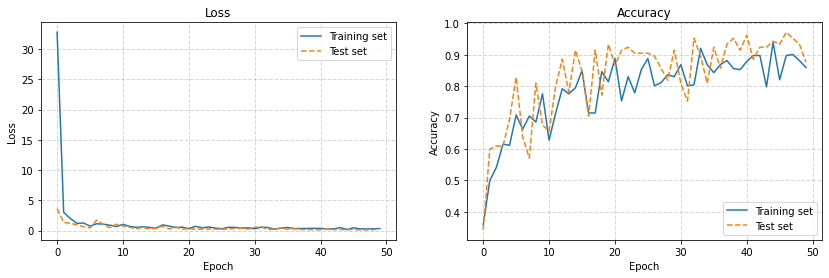

In [38]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    accuracy = training_history.history['acc']
    val_accuracy = training_history.history['val_acc']

    plt.figure(figsize=(14, 4))
    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy, label='Training set')
    plt.plot(val_accuracy, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.show()

render_training_history(history4)

The model seems to be performing well; not underfitting or overfitting too severely. The trend lines indicate that while a greater number of epochs may improve the performance slightly, our conclusion is that having a larger dataset will definitely improve the model performance. The training and validation sets having accuracies very tight to each other in most intervals shows that the performance of the model is good.

# TESTING

In [43]:
filenames = test_generator.filenames
nb_samples = len(filenames)

pred=model.predict_generator(test_generator, steps=len(test_generator), verbose=1)

33/33 [==============================] - 1s 39ms/step


In [44]:
predict

array([[8.48947287e-01, 2.55089030e-02, 1.25543833e-01],
       [2.29032099e-01, 1.05177071e-02, 7.60450184e-01],
       [8.05323124e-01, 1.17533524e-02, 1.82923585e-01],
       [8.68583381e-01, 9.37684067e-03, 1.22039802e-01],
       [9.72300172e-01, 5.52805839e-03, 2.21717227e-02],
       [8.78689706e-01, 4.48882999e-03, 1.16821490e-01],
       [9.59648073e-01, 5.59223071e-03, 3.47596966e-02],
       [8.90919089e-01, 1.50426209e-03, 1.07576609e-01],
       [9.80676889e-01, 3.79594043e-03, 1.55272344e-02],
       [1.38969839e-01, 1.53063405e-02, 8.45723867e-01],
       [6.76406205e-01, 5.79257822e-03, 3.17801207e-01],
       [1.90974355e-01, 2.67830193e-01, 5.41195452e-01],
       [3.50420445e-01, 2.13283747e-01, 4.36295807e-01],
       [2.20312439e-02, 8.82687628e-01, 9.52810869e-02],
       [2.11994673e-04, 9.94716942e-01, 5.07111102e-03],
       [7.91668057e-01, 2.34285034e-02, 1.84903473e-01],
       [1.63759003e-04, 9.99454439e-01, 3.81909747e-04],
       [7.29430394e-05, 9.99763

In [47]:
predicted_class_indices=np.argmax(pred,axis=1)

In [48]:
predicted_class_indices

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2])

In [50]:
labels = (training_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [51]:
labels

{0: 'Paper', 1: 'Rock', 2: 'Scissors'}

In [53]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})

In [54]:
results

,Filename,Predictions
0,Test_set/Paper_144.jpg,Paper
1,Test_set/Paper_145.jpg,Scissors
2,Test_set/Paper_146.jpg,Paper
3,Test_set/Paper_147.jpg,Paper
4,Test_set/Paper_148.jpg,Paper
5,Test_set/Paper_149.jpg,Paper
6,Test_set/Paper_150.jpg,Paper
7,Test_set/Paper_77.jpg,Paper
8,Test_set/Paper_78.jpg,Paper
9,Test_set/Paper_79.jpg,Scissors


accuracy = 25/33 = 75.75%

The model isn't generalizing as well to the test data, a sign of overfitting. The possible reasons for the same are:
1. small size of test set - collect more data
2. possible correlation between test images 